## Diagnosis and Important Feature Selection Using Common Medical Data

#### A Use Case of Artificial Neural Networks

In [ ]:
#install shap , run once only
!pip install shap

     |████████████████████████████████| 327kB 5.8MB/s 
  Created wheel for shap: filename=shap-0.37.0-cp36-cp36m-linux_x86_64.whl size=463902 sha256=1938f3c18323ef371767d62c3c0f9717813378e6e602dad8fd4f7846a388fa28
  Stored in directory: /root/.cache/pip/wheels/df/ad/b0/aa7815ec68850d66551ef618095eccb962c8f6022f1d3dd989
Successfully built shap


In [ ]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import shap

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing the dataset
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/TrimmedData.xlsx')
df = df.drop(columns=['Unnamed: 0','SEQN'])
print(df)


      RIAGENDR  RIDAGEYR  RIDRETH3  DMDEDUC3  ...  SMQ621  SMQ040  DIQ010  DIQ175A
0            2         2         6       NaN  ...     NaN     NaN     2.0      NaN
1            1         2         3       NaN  ...     NaN     NaN     2.0      NaN
2            2        66         4       NaN  ...     NaN     3.0     2.0      NaN
3            1        18         6      15.0  ...     NaN     NaN     2.0      NaN
4            1        13         7       6.0  ...     1.0     NaN     2.0      NaN
...        ...       ...       ...       ...  ...     ...     ...     ...      ...
9249         2        70         6       NaN  ...     NaN     NaN     3.0      NaN
9250         1        42         1       NaN  ...     NaN     3.0     2.0      NaN
9251         2        41         4       NaN  ...     NaN     NaN     2.0      NaN
9252         2        14         4       8.0  ...     1.0     NaN     2.0      NaN
9253         1        38         3       NaN  ...     NaN     1.0     2.0      NaN

[92

In [ ]:
#Manipulate data
# print(df.isnull().sum())
# remove features with too little data < 33% populated
df_nonull = df.copy()
for feature in df.columns:
  if df[feature].isnull().sum() >= 6000:
    df_nonull = df_nonull.drop(columns=[feature])

# average out NaN values
# df_nonull.info()
df_X = df_nonull.copy().drop(columns='DIQ010')
df_X = df_X.fillna(df_X.mean())
df_Y = df_nonull['DIQ010']
df_Y.fillna(2)

# Encoding categorical data
X = df_X.to_numpy()
Y = df_Y.to_numpy()
# Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, label_binarize
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)
# labelencoder_X_2 = LabelEncoder()
# X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])
Y = label_binarize(Y, classes=[0,1,2])
# X = onehotencoder.fit_transform(X).toarray()
# X = X[:, 1:]
print(df_nonull)
print(Y)

      RIAGENDR  RIDAGEYR  RIDRETH3  DMDEDUC2  ...  PAQ635  PAQ650  PAQ665  DIQ010
0            2         2         6       NaN  ...     NaN     NaN     NaN     2.0
1            1         2         3       NaN  ...     NaN     NaN     NaN     2.0
2            2        66         4       2.0  ...     2.0     2.0     1.0     2.0
3            1        18         6       NaN  ...     1.0     2.0     1.0     2.0
4            1        13         7       NaN  ...     NaN     NaN     NaN     2.0
...        ...       ...       ...       ...  ...     ...     ...     ...     ...
9249         2        70         6       3.0  ...     2.0     2.0     1.0     3.0
9250         1        42         1       3.0  ...     2.0     2.0     2.0     2.0
9251         2        41         4       5.0  ...     2.0     2.0     1.0     2.0
9252         2        14         4       NaN  ...     NaN     NaN     NaN     2.0
9253         1        38         3       4.0  ...     2.0     2.0     2.0     2.0

[9254 rows x 16

In [ ]:
#Split, Scale Data
                
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.4, random_state = 42)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



In [ ]:
print(X_train.shape, y_train.shape)

(5552, 15) (5552, 3)


In [ ]:
#the ANN Model
import keras
from keras.models import Sequential
from keras.layers import Dense

#initialize the ANN as a sequence of layers
classifier = Sequential()

#adding the input layer and the first hidden layer 
classifier.add(Dense(64, activation = 'relu', input_dim = 15))

#adding the second hidden layer
classifier.add(Dense(32, activation = 'relu'))

#adding the second hidden layer
classifier.add(Dense(16, activation = 'relu'))

#adding the output layer
classifier.add(Dense(3, activation = 'sigmoid'))

#Compiling the ANN - apply stochastic gradient descent 
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])



In [ ]:
# model info
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1024      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 51        
Total params: 3,683
Trainable params: 3,683
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Traning
classifier.fit(X_train, y_train, batch_size = 25, epochs = 200)



Epoch 1/200
223/223 [==============================] - 0s 1ms/step - loss: 0.3111 - accuracy: 0.8220
Epoch 2/200
223/223 [==============================] - 0s 1ms/step - loss: 0.2380 - accuracy: 0.8465
Epoch 3/200
223/223 [==============================] - 0s 1ms/step - loss: 0.2262 - accuracy: 0.8465
Epoch 4/200
223/223 [==============================] - 0s 1ms/step - loss: 0.2175 - accuracy: 0.8464
Epoch 5/200
223/223 [==============================] - 0s 1ms/step - loss: 0.2120 - accuracy: 0.8471
Epoch 6/200
223/223 [==============================] - 0s 1ms/step - loss: 0.2080 - accuracy: 0.8471
Epoch 7/200
223/223 [==============================] - 0s 1ms/step - loss: 0.2055 - accuracy: 0.8478
Epoch 8/200
223/223 [==============================] - 0s 1ms/step - loss: 0.2036 - accuracy: 0.8501
Epoch 9/200
223/223 [==============================] - 0s 1ms/step - loss: 0.2011 - accuracy: 0.8487
Epoch 10/200
223/223 [==============================] - 0s 1ms/step - loss: 0.2004 - accura

In [ ]:
# Prediction and Testing
y_pred = classifier.predict(X_test)
y_label = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test, axis=-1)
match = 0
for i in range(y_label.shape[0]):
  if y_label[i] == y_true[i]:
    match +=1
print((match/y_label.shape[0])*100)

81.95569962182604


In [ ]:
# Analysis of Feature Set
# Deepshap analysis
background = X_train[np.random.choice(X_train.shape[0], 100, replace=False)]
e = shap.DeepExplainer(classifier, background)
shap_values = e.shap_values(X_test)

Instructions for updating:
Simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


keras is no longer supported, please use tf.keras instead.


In [ ]:
# save values for later use
np.save('shaply_values.npy',shap_values)

(3702, 15)


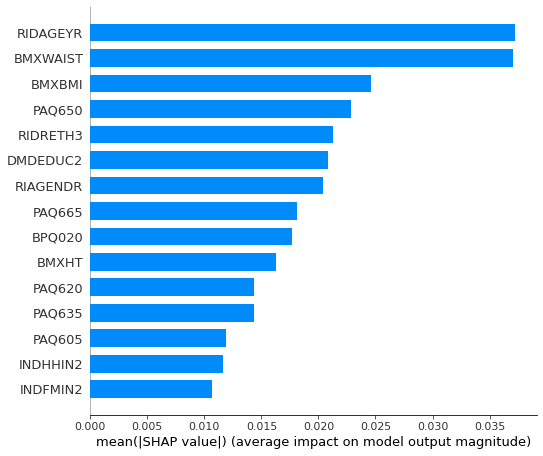

In [ ]:
print(shap_values[0].shape)
# plot features
shap.summary_plot(shap_values[0], X_test, plot_type="bar",feature_names=df_X.columns)

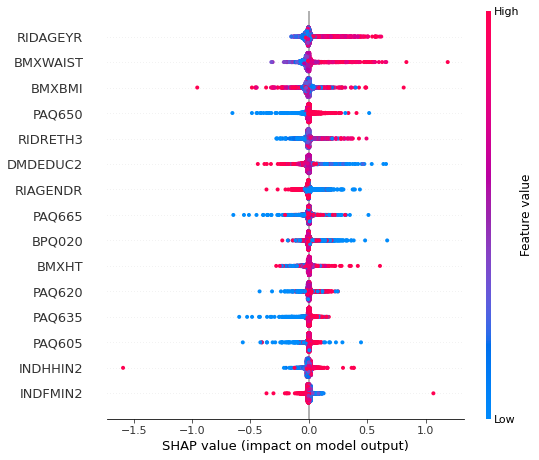

In [ ]:
shap.summary_plot(shap_values[0], X_test,feature_names=df_X.columns)